# Exploratory Data Analysis (EDA)

This notebook explores the sentiment analysis dataset to understand its structure, class distribution, and text characteristics.

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Display first few rows
df_train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment
0,I caught this little gem totally by accident b...,positive
1,I can't believe that I let myself into this mo...,negative
2,*spoiler alert!* it just gets to me the nerve ...,negative
3,If there's one thing I've learnt from watching...,negative
4,"I remember when this was in theaters, reviews ...",negative


In [39]:

# Check dataset info
df_train.info()

# Check for missing values
df_train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


review       0
sentiment    0
dtype: int64

As we can see there are no missing values.

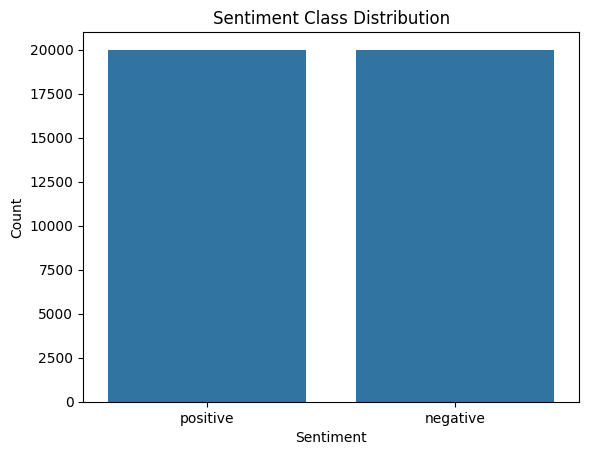

In [40]:

# Plot class distribution
sns.countplot(x=df_train['sentiment'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


As we can see the distribution of the data is very good and the data is well balanced.

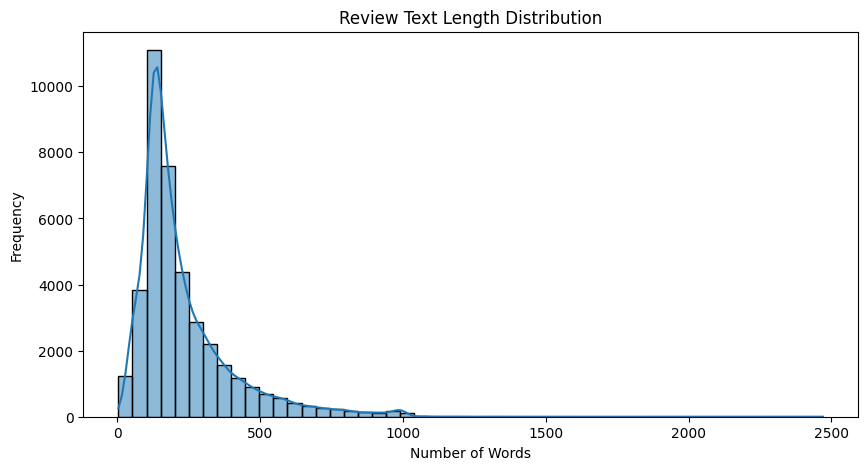

In [41]:

# Calculate review lengths
df_train['text_length'] = df_train['review'].apply(lambda x: len(x.split()))

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(df_train['text_length'], bins=50, kde=True)
plt.title('Review Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


As we can see, the distribution of text lengths is skewed to the right, indicating that most reviews are relatively short, with a few longer reviews.

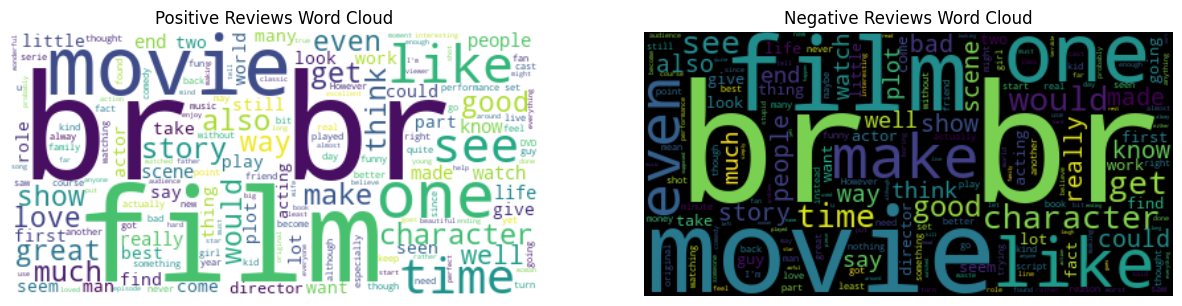

In [42]:

# Separate positive and negative reviews
positive_reviews = ' '.join(df_train[df_train['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df_train[df_train['sentiment'] == 'negative']['review'])

# Generate word clouds
fig, ax = plt.subplots(1, 2, figsize=(15,7))

wordcloud_positive = WordCloud(stopwords=set(stopwords.words('english')), background_color='white').generate(positive_reviews)
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Reviews Word Cloud')
ax[0].axis('off')

wordcloud_negative = WordCloud(stopwords=set(stopwords.words('english')), background_color='black').generate(negative_reviews)
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Reviews Word Cloud')
ax[1].axis('off')

plt.show()


The word cloud for positive reviews highlights words such as 'film,' 'great,' and 'character,' showing common themes of positive sentiment.
The negative word cloud features words like 'movie,' 'bad,' and 'time,' emphasizing dissatisfaction and negative experiences.
The data looks consistent, however we can notice the presence of HTML tags like <br> in the reviews, which are not actual words and need to be cleaned during text preprocessing.

# Text Preprocessing

Now we will move to the text preprocessing techniques, including:
1. HTML Tag Removal
2. Tokenization
3. Stop-word Removal
4. Stemming vs Lemmatization

In [43]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Download required NLTK resources
nltk.download('wordnet')

df = df_train.copy()
# print html tags number
print('Number of HTML tags in the dataset:')
print(df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').find_all()).apply(len).sum())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\felob\AppData\Local\Temp\ipykernel_13664\3308404792.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  print(df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').find_all()).apply(len).sum())


Number of HTML tags in the dataset:
161131


As we can see there are a lot of HTML tags.

In [44]:

def remove_html_tags(text):
    """Remove HTML tags (e.g., <br>) from the text."""
    return BeautifulSoup(text, "html.parser").get_text()

# Apply HTML tag removal
df['review'] = df['review'].apply(remove_html_tags)
# print html tags number
print('Number of HTML tags in the dataset after cleaning:')
print(df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').find_all()).apply(len).sum())


C:\Users\felob\AppData\Local\Temp\ipykernel_13664\3406079052.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


Number of HTML tags in the dataset after cleaning:


C:\Users\felob\AppData\Local\Temp\ipykernel_13664\3406079052.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  print(df['review'].apply(lambda x: BeautifulSoup(x, 'html.parser').find_all()).apply(len).sum())


0


In [45]:

def tokenize_text(text):
    """Split text into words."""
    return text.split()

# Apply tokenization
df['tokens'] = df['review'].apply(tokenize_text)
df[['review', 'tokens']].head()


,review,tokens
0,I caught this little gem totally by accident b...,"[I, caught, this, little, gem, totally, by, ac..."
1,I can't believe that I let myself into this mo...,"[I, can't, believe, that, I, let, myself, into..."
2,*spoiler alert!* it just gets to me the nerve ...,"[*spoiler, alert!*, it, just, gets, to, me, th..."
3,If there's one thing I've learnt from watching...,"[If, there's, one, thing, I've, learnt, from, ..."
4,"I remember when this was in theaters, reviews ...","[I, remember, when, this, was, in, theaters,, ..."


In [46]:

def remove_stopwords(tokens):
    """Remove common stopwords from the tokens."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

# Apply stop-word removal
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)
df[['tokens', 'filtered_tokens']].head()


,tokens,filtered_tokens
0,"[I, caught, this, little, gem, totally, by, ac...","[caught, little, gem, totally, accident, back,..."
1,"[I, can't, believe, that, I, let, myself, into...","[can't, believe, let, movie, accomplish, favor..."
2,"[*spoiler, alert!*, it, just, gets, to, me, th...","[*spoiler, alert!*, gets, nerve, people, remak..."
3,"[If, there's, one, thing, I've, learnt, from, ...","[there's, one, thing, I've, learnt, watching, ..."
4,"[I, remember, when, this, was, in, theaters,, ...","[remember, theaters,, reviews, said, horrible...."


Tokenizing and filtering tokens worked correctly.

In [47]:

def apply_stemming(tokens):
    """Apply stemming to tokens using Porter Stemmer."""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

def apply_lemmatization(tokens):
    """Apply lemmatization to tokens using WordNet Lemmatizer."""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply stemming and lemmatization
df['stemmed_tokens'] = df['filtered_tokens'].apply(apply_stemming)
df['lemmatized_tokens'] = df['filtered_tokens'].apply(apply_lemmatization)

df[['filtered_tokens', 'stemmed_tokens', 'lemmatized_tokens']].head()


,filtered_tokens,stemmed_tokens,lemmatized_tokens
0,"[caught, little, gem, totally, accident, back,...","[caught, littl, gem, total, accid, back, 1980,...","[caught, little, gem, totally, accident, back,..."
1,"[can't, believe, let, movie, accomplish, favor...","[can't, believ, let, movi, accomplish, favor, ...","[can't, believe, let, movie, accomplish, favor..."
2,"[*spoiler, alert!*, gets, nerve, people, remak...","[*spoiler, alert!*, get, nerv, peopl, remak, (...","[*spoiler, alert!*, get, nerve, people, remake..."
3,"[there's, one, thing, I've, learnt, watching, ...","[there', one, thing, i'v, learnt, watch, georg...","[there's, one, thing, I've, learnt, watching, ..."
4,"[remember, theaters,, reviews, said, horrible....","[rememb, theaters,, review, said, horrible., w...","[remember, theaters,, review, said, horrible.,..."


Stemming reduced words to their root forms but often produced non-standard terms (e.g., 'accid' instead of 'accident').
Lemmatization preserved the semantic meaning of words and produced more readable tokens (e.g., 'accident' remained 'accident').
Based on the results, lemmatization appears to be a better choice for this dataset as it balances readability and normalization.

## Feature Vectorization
To prepare the text for modeling, we convert it into numerical representations using vectorization techniques. Below are two popular methods:

1. TF-IDF (Term Frequency-Inverse Document Frequency)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review'])

# Convert to a DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF feature matrix
print("TF-IDF Vectorization Matrix:")
print(tfidf_df.head())

TF-IDF Vectorization Matrix:
    00  000        10  100   11   12   13  13th        14        15  ...  \
0  0.0  0.0  0.061437  0.0  0.0  0.0  0.0   0.0  0.000000  0.000000  ...   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.134792  0.000000  ...   
2  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.000000  ...   
3  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.065129  ...   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.000000  ...   

        you  young  younger      your  yourself  youth  zero  zombie  zombies  \
0  0.065306    0.0      0.0  0.000000  0.000000    0.0   0.0     0.0      0.0   
1  0.000000    0.0      0.0  0.061437  0.000000    0.0   0.0     0.0      0.0   
2  0.000000    0.0      0.0  0.000000  0.135342    0.0   0.0     0.0      0.0   
3  0.104828    0.0      0.0  0.036140  0.000000    0.0   0.0     0.0      0.0   
4  0.030530    0.0      0.0  0.000000  0.000000    0.0   0.0     0.0      0.0   

   zone  
0   0.0  
1   0.0

2. Count Vectorization (Bag-of-Words)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # Use top 5000 features
count_matrix = count_vectorizer.fit_transform(df['review'])

# Convert to a DataFrame for inspection
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the Count Vectorization feature matrix
print("Count Vectorization Matrix:")
print(count_df.head())


Count Vectorization Matrix:
   00  000  10  100  11  12  13  13th  14  15  ...  you  young  younger  your  \
0   0    0   1    0   0   0   0     0   0   0  ...    2      0        0     0   
1   0    0   0    0   0   0   0     0   1   0  ...    0      0        0     1   
2   0    0   0    0   0   0   0     0   0   0  ...    0      0        0     0   
3   0    0   0    0   0   0   0     0   0   1  ...    5      0        0     1   
4   0    0   0    0   0   0   0     0   0   0  ...    1      0        0     0   

   yourself  youth  zero  zombie  zombies  zone  
0         0      0     0       0        0     0  
1         0      0     0       0        0     0  
2         1      0     0       0        0     0  
3         0      0     0       0        0     0  
4         0      0     0       0        0     0  

[5 rows x 5000 columns]


### Comparison of TF-IDF and Count Vectorization  
- TF-IDF: Highlights unique and important words by assigning higher weights to rare but meaningful terms. It helps reduce the influence of overly common words, improving the model's ability to capture sentiment-specific patterns.  
- Count Vectorization: Simpler approach that focuses on raw word frequencies, which can work well when word counts strongly correlate with sentiment but might overemphasize common words.  

Key Difference: TF-IDF emphasizes word importance and rarity, whereas Count Vectorization treats all words equally, purely based on their frequency.  


# Baseline Model Training
For the baseline model, we use Logistic Regression, a simple and efficient model for binary classification. We'll evaluate its performance using accuracy, precision, recall, and F1-score.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare data
X = tfidf_matrix  # Replace with 'count_matrix' for Count Vectorization
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Encode target as 1 (positive), 0 (negative)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.8891
Precision: 0.8799
Recall: 0.9012
F1-Score: 0.8905


In [51]:
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4000
    positive       0.88      0.90      0.89      4000

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000



As we can see the baseline Logistic Regression model achieved strong performance with 88.91% accuracy and balanced precision, recall, and F1-scores across both classes.
Now we will proceede with adding more models for comparison.

## Train and Evaluate Additional Models
### Naïve Bayes Model

In [52]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naïve Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naïve Bayes Precision: {precision_nb:.4f}")
print(f"Naïve Bayes Recall: {recall_nb:.4f}")
print(f"Naïve Bayes F1-Score: {f1_nb:.4f}")


Naïve Bayes Accuracy: 0.8566
Naïve Bayes Precision: 0.8523
Naïve Bayes Recall: 0.8628
Naïve Bayes F1-Score: 0.8575


### Support Vector Machine (SVM)

In [53]:
from sklearn.svm import LinearSVC

# Initialize and train the SVM model
svm_model = LinearSVC(max_iter=1000)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")


c:\Users\felob\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.8842
SVM Precision: 0.8769
SVM Recall: 0.8940
SVM F1-Score: 0.8854


### **Model Comparison**

| Model                | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | **0.8891**   | **0.8799**    | **0.9012** | **0.8905**   |
| Naïve Bayes          | 0.8566   | 0.8523    | 0.8628 | 0.8575   |
| SVM                  | 0.8842   | 0.8769    | 0.8940 | 0.8854   |

---

### **Comments**
- **Logistic Regression** achieved the highest performance with an **accuracy of 88.91%** and a balanced precision, recall, and F1-score.
- **Naïve Bayes** performed the lowest overall with an accuracy of **85.66%**, as it assumes feature independence, which may not hold well for this dataset.
- **SVM** came close to Logistic Regression, achieving an accuracy of **88.42%**, but slightly lower precision and F1-scores compared to Logistic Regression.

---

### **Conclusion**
- **Logistic Regression** is selected as the best model for this task due to its slightly better overall performance and simplicity compared to SVM.
- Both Logistic Regression and SVM performed well and could be used for sentiment classification, while Naïve Bayes may not be as suitable for this dataset.
